In [ ]:
pip install tensorflow numpy pandas matplotlib seaborn opencv-python scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = "/content/drive/My Drive/Germany/Project_with_Tsaliskan_Emre/Training_Project_01/Metal_Casting_Data_LindeWiemann/casting_data_300x300/casting_data/train"


In [ ]:
import os
print("Subfolders in dataset:", os.listdir(dataset_path))

Subfolders in dataset: ['ok_front', 'def_front']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define Image Size & Batch Size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,  # Randomly rotate images by 20 degrees
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest',
    validation_split=0.2  # Keep validation split
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)
# Load Validation Dataset
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 5307 images belonging to 2 classes.
Found 1326 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(64, activation='relu'),  # Reduce Dense neurons from 128 to 64
    Dropout(0.5),  # Keep Dropout to prevent overfitting
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,705,921 (14.14 MB)

 Trainable params: 3,705,921 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),  # Increase Dropout from 0.5 to 0.6
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=20,  # Reduce the number of epochs
    validation_data=val_generator,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 1214s 7s/step - accuracy: 0.5433 - loss: 0.7631 - val_accuracy: 0.5664 - val_loss: 0.6817
Epoch 2/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.5653 - loss: 0.6777 - val_accuracy: 0.4721 - val_loss: 0.6932
Epoch 3/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.5625 - loss: 0.6711 - val_accuracy: 0.6878 - val_loss: 0.5987
Epoch 4/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.7160 - loss: 0.5955 - val_accuracy: 0.7255 - val_loss: 0.5870
Epoch 5/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.7620 - loss: 0.5245 - val_accuracy: 0.7783 - val_loss: 0.5010
Epoch 6/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.7836 - loss: 0.4828 - val_accuracy: 0.7881 - val_loss: 0.4583
Epoch 7/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.7975 - loss: 0.4733 - val_accuracy: 0.8024 - val_loss: 0.4327
Epoch 8/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.8071 - loss: 0.4365 - val_acc

In [ ]:
test_image_path = "/content/drive/My Drive/Germany/Project_with_Tsaliskan_Emre/Training_Project_01/Metal_Casting_Data_LindeWiemann/casting_data_300x300/casting_data/test/def_front/cast_def_0_7.jpeg"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


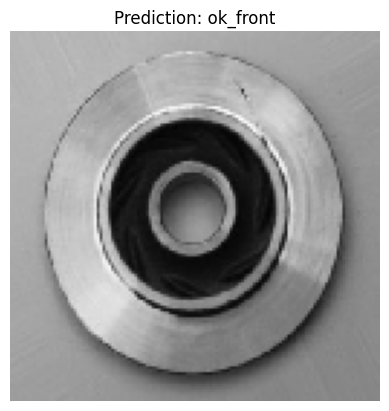

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Update to (224, 224) if you used that
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 128, 128, 3)

    prediction = model.predict(img_array)

    # Classify based on threshold
    class_name = "def_front" if prediction[0][0] > 0.5 else "ok_front"

    plt.imshow(img)
    plt.title(f"Prediction: {class_name}")
    plt.axis("off")
    plt.show()

# Predict the image
predict_image(test_image_path)

In [ ]:
import os

test_folder = "/content/drive/My Drive/Germany/Project_with_Tsaliskan_Emre/Training_Project_01/Metal_Casting_Data_LindeWiemann/casting_data_300x300/casting_data/test/def_front/"

for filename in os.listdir(test_folder):
    if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(test_folder, filename)
        print(f"Testing: {filename}")
        predict_image(img_path)


Output hidden; open in https://colab.research.google.com to view.

In [1]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'history' is not defined

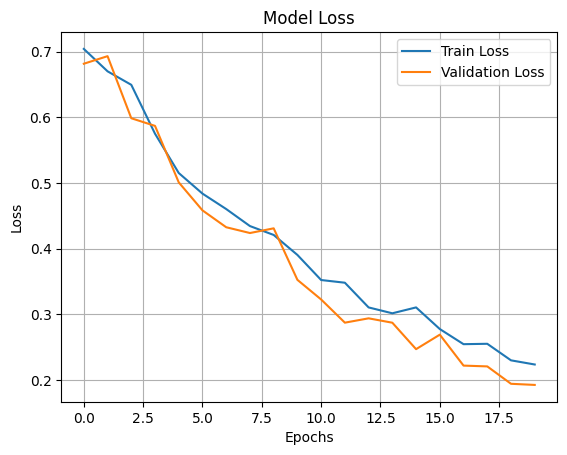

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {final_val_acc * 100:.2f}%")


Final Validation Accuracy: 93.29%


In [ ]:
test_generator = datagen.flow_from_directory(
    dataset_path,  # Path to your test set
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important: keep order for label alignment
)


Found 6633 images belonging to 2 classes.


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities
y_prob = model.predict(test_generator)

# Convert probabilities to binary (0 or 1)
y_pred = (y_prob > 0.5).astype(int).reshape(-1)

# Get actual labels
y_true = test_generator.classes


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


208/208 ━━━━━━━━━━━━━━━━━━━━ 113s 541ms/step


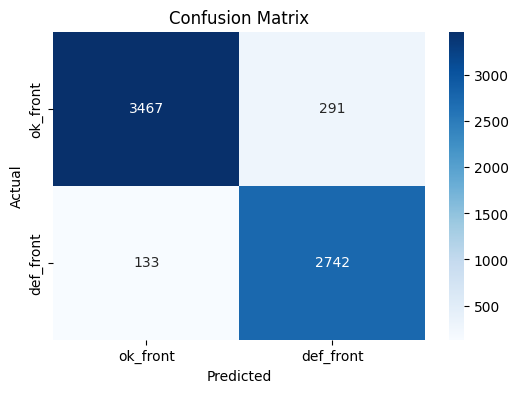

In [ ]:
cm = confusion_matrix(y_true, y_pred)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ok_front', 'def_front'],
            yticklabels=['ok_front', 'def_front'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=['ok_front', 'def_front'])
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

    ok_front       0.96      0.92      0.94      3758
   def_front       0.90      0.95      0.93      2875

    accuracy                           0.94      6633
   macro avg       0.93      0.94      0.94      6633
weighted avg       0.94      0.94      0.94      6633

